In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from scipy import stats

In [2]:
health = pd.read_csv("C:/Users/jmubalutila/Documents/CSC169C/Data sets/healthcare-dataset-stroke-data.csv")

In [3]:
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Missing value count in bmi column

In [5]:
health['bmi'].isna().sum()

201

### Missing value count in health dataframe

In [6]:
health.isna().sum().sum()

201

In [7]:
health.bmi.count()

4909

### percent of missing value count

In [8]:
percent_missing_value = health.isnull().sum()*100/len(health)

In [9]:
percent_missing_value

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

### Percent missing value is less than 30% of entire dataframe and can therefore be dropped.  

## Data Wrangling

## there's no specific information that can be assessed to evaluate the values of bmi NA, therefore all bmi NA data will be dropped from our dataset

In [10]:
health.dropna(inplace = True)

In [11]:
health.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Recode "ever_married", "work_type", "Residence_type" and "smoking_status" from text to numbers using cleanup

In [12]:
cleanup = {"ever_married":{"No":0, "Yes":1},
          "work_type":{"Never_worked":0, "Govt_job":1, "children":2, "Self-employed":3, "Private":4},
          "Residence_type":{"Rural":0, "Urban":1},
          "smoking_status":{"smokes":0, "formerly smoked":1, "Unknown":2, "never smoked":3},
          "gender":{"Other":0, "Male":1, "Female":2}}

In [13]:
healthR = pd.read_csv("C:/Users/jmubalutila/Documents/CSC169C/Data sets/healthcare-dataset-stroke-data.csv")

In [14]:
healthR.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### droping NA from healthR dataset

In [15]:
healthR.dropna(inplace=True)

In [16]:
healthR.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Using healthR to recode the health dataset by using the cleanup dictionaries

In [17]:
healthR.replace(cleanup, inplace=True)

In [18]:
healthR.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,4,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,4,0,105.92,32.5,3,1
3,60182,2,49.0,0,0,1,4,1,171.23,34.4,0,1
4,1665,2,79.0,1,0,1,3,0,174.12,24.0,3,1
5,56669,1,81.0,0,0,1,4,1,186.21,29.0,1,1


### Brief Data Analysis

In [46]:
health.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


In [19]:
health.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


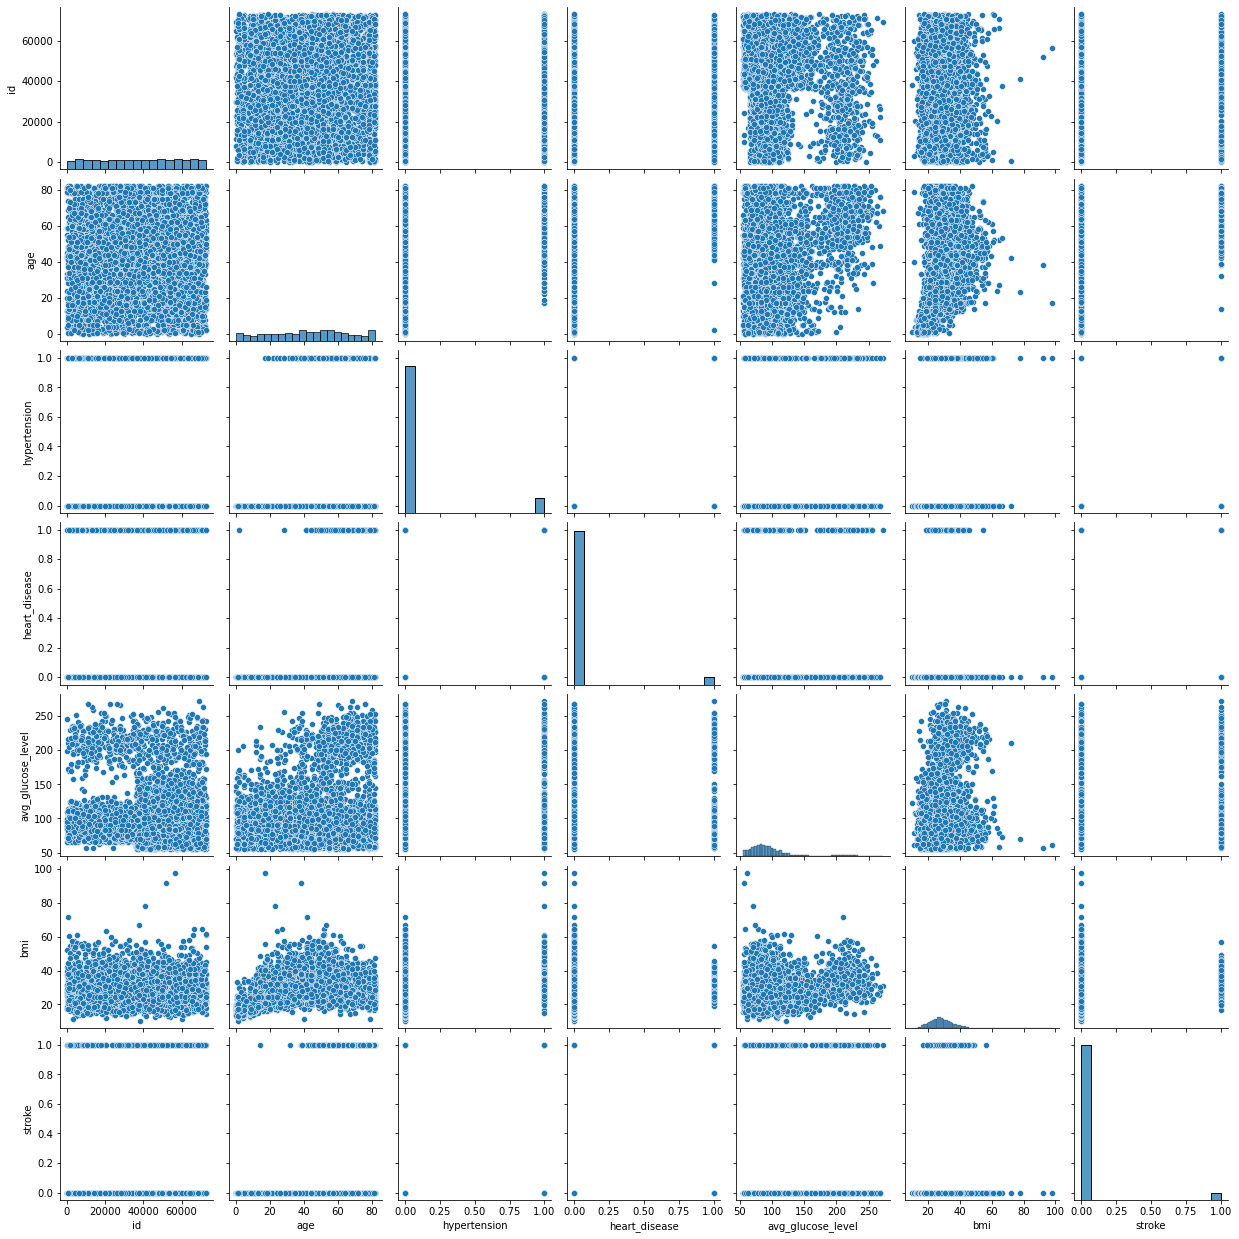

In [21]:
sns.pairplot(health)

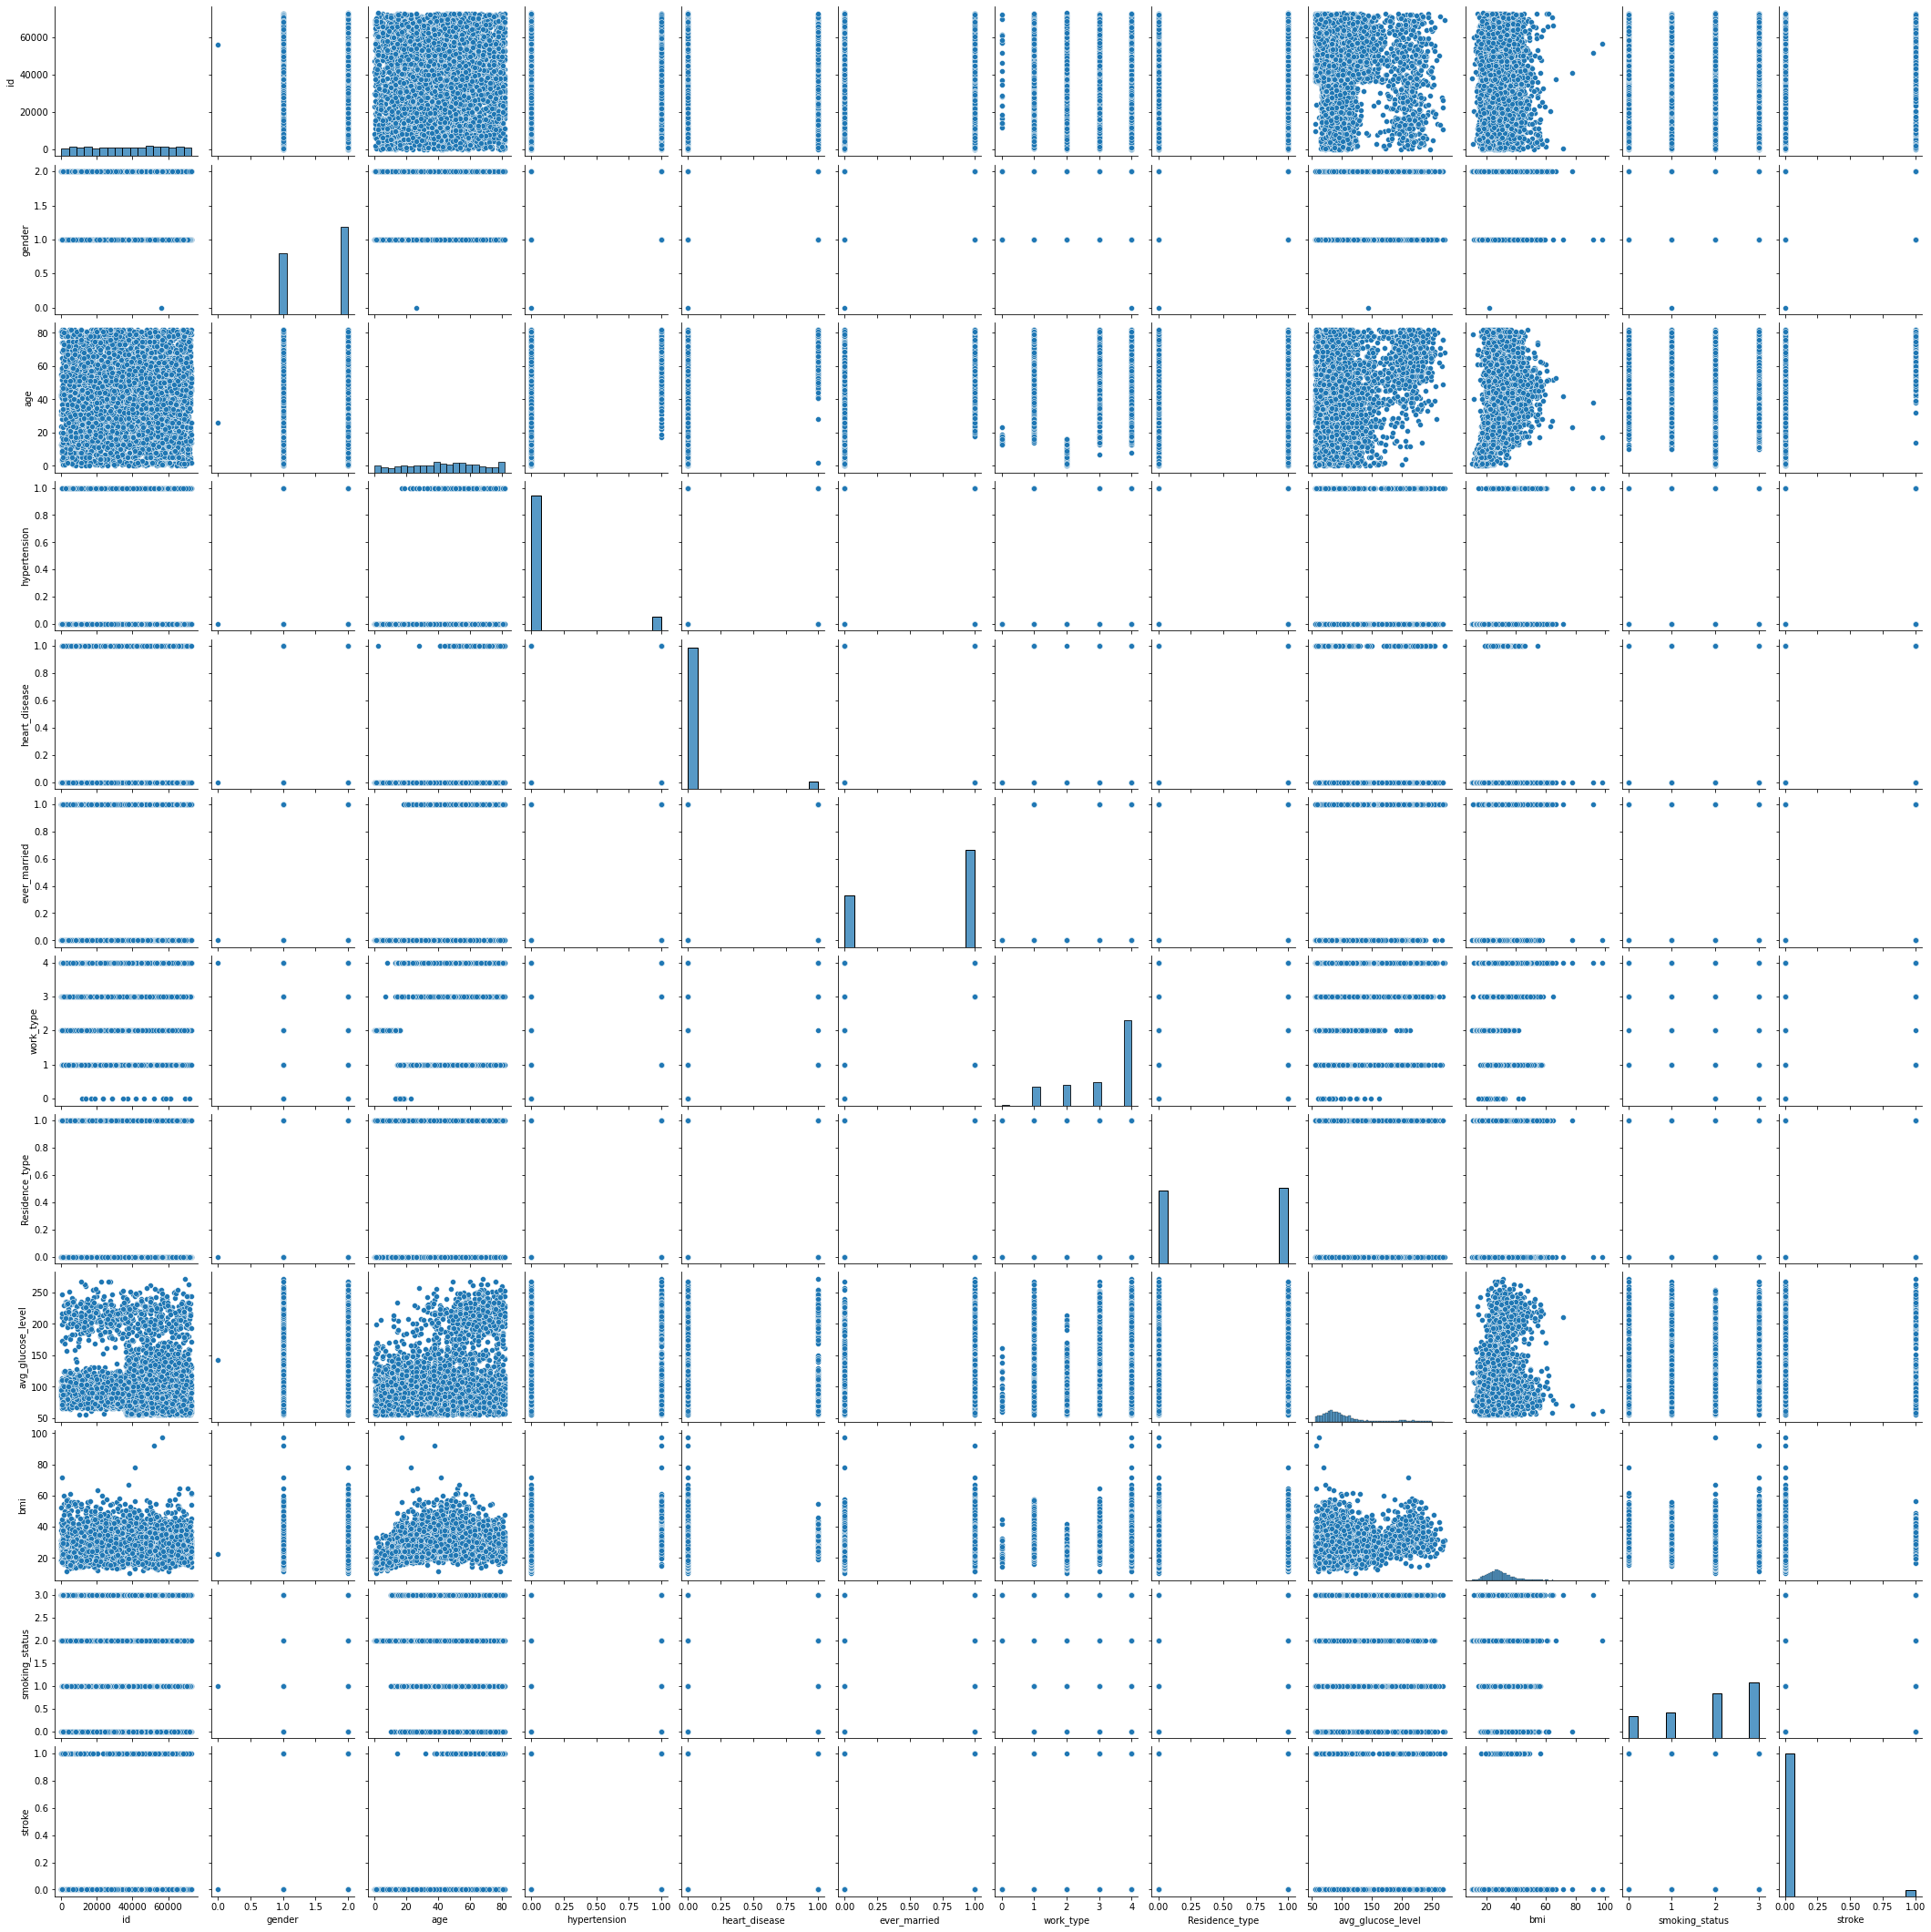

In [22]:
sns.pairplot(healthR)

<AxesSubplot:>

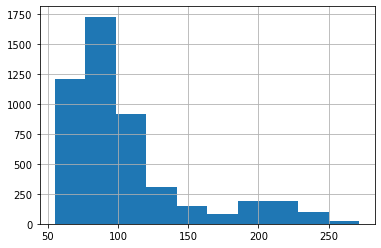

In [23]:
health.avg_glucose_level.hist()

### The distribution of the glucose level per patient is positively skewed

<AxesSubplot:>

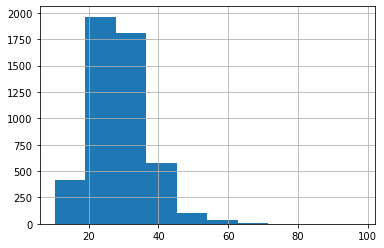

In [24]:
health.bmi.hist()

### the distribution of the bmi level appears positively skewed

In [25]:
health.value_counts("smoking_status")

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
dtype: int64

In [26]:
health.value_counts("Residence_type")

Residence_type
Urban    2490
Rural    2419
dtype: int64

In [27]:
health.value_counts("work_type")

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
dtype: int64

In [28]:
health.value_counts('gender')

gender
Female    2897
Male      2011
Other        1
dtype: int64

In [29]:
health.value_counts('age')

age
57.00    93
78.00    93
52.00    85
54.00    84
51.00    83
         ..
1.40      3
0.16      3
0.40      2
0.48      2
0.08      2
Length: 104, dtype: int64

In [30]:
health.value_counts('ever_married')

ever_married
Yes    3204
No     1705
dtype: int64

In [31]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


### Visualizing graph frequencies of independent variables

<AxesSubplot:>

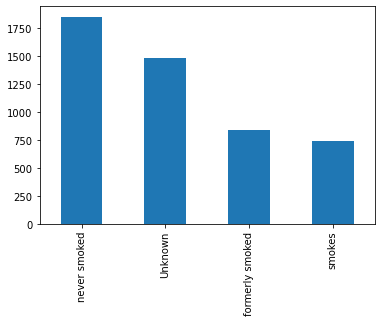

In [32]:
health['smoking_status'].value_counts().plot(kind='bar')

<AxesSubplot:>

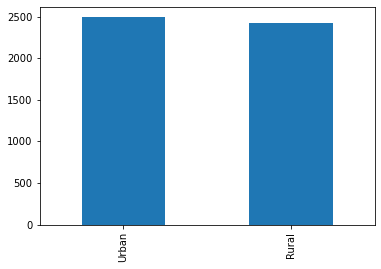

In [33]:
health['Residence_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

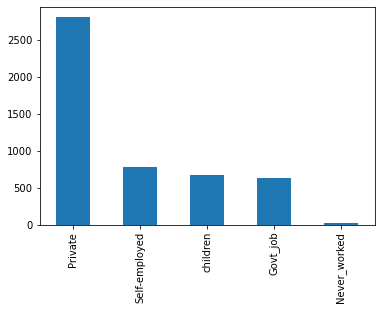

In [34]:
health['work_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

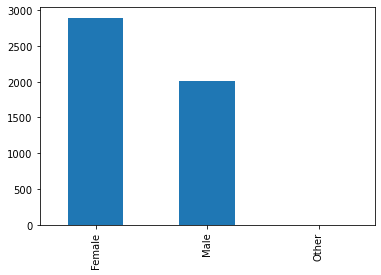

In [35]:
health['gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

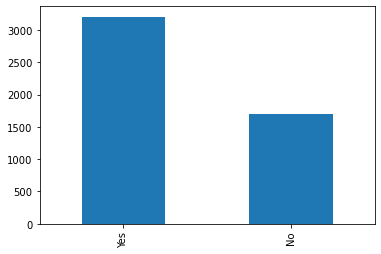

In [36]:
health['ever_married'].value_counts().plot(kind='bar')

<AxesSubplot:>

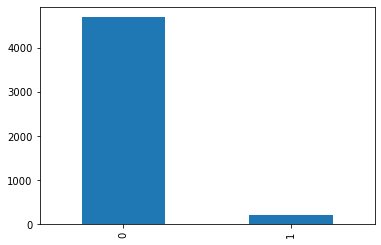

In [37]:
health['stroke'].value_counts().plot(kind='bar')

<AxesSubplot:>

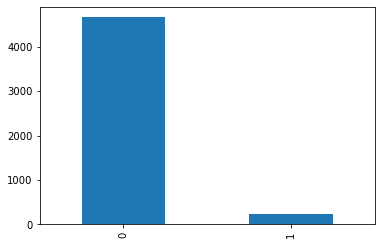

In [38]:
health['heart_disease'].value_counts().plot(kind='bar')

<AxesSubplot:>

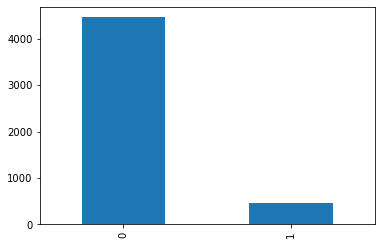

In [39]:
health['hypertension'].value_counts().plot(kind='bar')

### Independent Chi-Square: attempting to determine whether the rate of stroke is influenced by gender

### Test Assumption: the expected frequencies of the contingency table for each cell is to have 5 entries

### Create a contingency table

In [52]:
stroke_crosstab = pd.crosstab(health['gender'], health['stroke'])

In [53]:
stroke_crosstab

stroke,0,1
gender,,
Female,2777,120
Male,1922,89
Other,1,0


### Running the Independent Chi-Square

In [58]:
stats.chi2_contingency(stroke_crosstab)

(0.27843022275621393,
 0.8700408526403285,
 2,
 array([[2.77366062e+03, 1.23339377e+02],
        [1.92538195e+03, 8.56180485e+01],
        [9.57425138e-01, 4.25748625e-02]]))

### p value = 0.87. p value>0.05, therefore there is no significant difference in the stroke rate between gender

### All the values in the array table are over 5. therefore the assumption of independent chi-square has been met. 

### Independent Chi-Square: attempting to determine whether the rate of heart disease is influenced by gender

### Test Assumption: the expected frequencies of the contingency table for each cell is to have 5 entries

### Create a contingency table

In [64]:
heart_crosstab = pd.crosstab(health['gender'], health['heart_disease'])

In [65]:
heart_crosstab

heart_disease,0,1
gender,,
Female,2797,100
Male,1868,143
Other,1,0


### Running the Independent Chi-Square

In [66]:
stats.chi2_contingency(heart_crosstab)

(33.82948671103573,
 4.508377751320526e-08,
 2,
 array([[2.75359584e+03, 1.43404156e+02],
        [1.91145366e+03, 9.95463435e+01],
        [9.50499083e-01, 4.95009167e-02]]))

### p value<0.05, therefore there the rate of heart disease is significantly influenced by gender

### Also, the assumption of independent chi-square has been met. All the values in each array cell is over 5. 

### Independent Chi-Square: attempting to determine whether the rate of hypertension is influenced by gender

### Test Assumption: the expected frequencies of the contingency table for each cell is to have 5 entries

### Create a contingency table

In [67]:
hypertension_crosstab = pd.crosstab(health['gender'], health['hypertension'])

In [68]:
hypertension_crosstab

hypertension,0,1
gender,,
Female,2646,251
Male,1811,200
Other,1,0


### Running the Independent Chi-Square

In [69]:
stats.chi2_contingency(hypertension_crosstab)

(2.4364509382532313,
 0.29575452707901817,
 2,
 array([[2.63084661e+03, 2.66153392e+02],
        [1.82624526e+03, 1.84754736e+02],
        [9.08127928e-01, 9.18720717e-02]]))

### p value>0.05, therefore the rate of hypertension is not influenced by whether you are a male or a female. 

### Also, the assumption of independent chi-square has been met. All the values in each array cell is over 5. 